<h1 style="color:blue;"> Critères du choix  de modèles </h1>

## Modèle : $X_t= f(t,\theta)+\varepsilon_{t}$ où $\varepsilon_{t} \sim \mathcal{N}(0,\sigma^2)$: 
        
<h3>  L'estimateur de $\sigma^2$  est : </h3>
$$\hat{\sigma}^2 =\frac{1}{T} \sum\limits_{t=1}^{T} \big( x_{t}-f(t,\hat{\theta})\big)^{2}$$
<h3> L'erreur quadratique moyenne (MSE)  définie par </h3> 
$$MSE =\frac{1}{T-d-1} \sum\limits_{t=1}^{T} \big( x_{t}-f(t,\hat{\theta})\big)^{2}$$

qui est un estimateurs sans biais pour $\sigma^2$, avec $d=dim \,\theta$

<h2>  Critère d'information d'Akaike (AIC) </h2>

<h3> <span style='font-size:50px;'>&#9758;</span> <a href="https://www.erudit.org/fr/revues/ae/2004-v80-n2-3-ae958/011386ar.pdf"> Voir ici pp 210-211</a>  </h3>


Le critère d'information d'Akaike, (en anglais Akaike information criterion ou AIC) est une mesure de la qualité d'un modèle statistique proposée par Hirotugu Akaike en 1973.

Lorsque l'on estime un modèle statistique, il est possible d'augmenter la vraisemblance du modèle en ajoutant un paramètre. Le critère d'information d'Akaike, tout comme le critère d'information bayésien, permet de pénaliser les modèles en fonction du nombre de paramètres afin de satisfaire le critère de parcimonie. On choisit alors le modèle avec le 
critère d'information d'Akaike le plus faible.

<h3> $$\displaystyle AIC=log\big(\hat{\sigma}^2 \big)+ \frac{2d}{T}$$ </h3> 

## Critère d'information BIC (le critère d'information bayésien)

<h3> $$\displaystyle  BIC=log\big(\hat{\sigma}^2 \big)+d\, \frac{log(T)}{T}$$</h3> 

<h3 style="color:blue;">  Etude du modèle exponentielle type I  :  (16), page 14 </h3> 
<h3> $$X_t= \alpha_{1} +\alpha_{2}\, t^{\alpha_{3}}+\varepsilon_{t} \,\,\,\, \varepsilon_{t} \sim \mathcal{N}(0,\sigma^2)$$
</h3> 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.optimize as opt # pour optimisation
import numpy
import random

#####    pour les warnings   #####
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
###################################

def ajustement_exp_I(data):
    ### data = alpha_1+alpha_2*t^{alpha_3} +E
    NN=len(data)
    t=numpy.arange(1,NN+1,1) ## t=[1,2,...,NN]
    
    def Objective(alpha):
        b1 = alpha[0]
        b2 = alpha[1]
        b3 = alpha[2]
        return data-b1-b2*(t**b3)  # distance entre données et le modèle

    
    alpha0=[random.random() for _ in range(3)] # valeur initiale
    R=opt.leastsq(Objective, alpha0)[0]  # valeur optimale
    
    # graphe
    fig, ax = plt.subplots(figsize=(11, 7))
    ax.spines['top'].set_visible(False)    # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    plt.plot(t, data,'o', label='données brutes', markersize=10)
    plt.plot(t,R[0]+R[1]*t**R[2], 'r', label="données ajustementées")
    plt.legend()
    # affichage
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    plt.title("$\\hat{\\alpha}_{1}$=%.4f , $\\hat{\\alpha}_{2}$=%.4f , $\\hat{\\alpha}_{3}$=%.4f"%(R[0],R[1],R[2])
              , fontdict=font)
    
    plt.xlabel("$t$", fontdict=font)
    plt.ylabel("$X_{t}=\\alpha_{1}+\\alpha_{2} t^{\\alpha_{3}}$", fontdict=font)
    plt.show()
    # variance des résidus
    S2=numpy.dot(Objective(R),Objective(R))
    V_R=S2/(1.0*NN)
    MSE=S2/(NN-len(R)-1.0)
    AIC=numpy.log(V_R)+(2.0*len(R))/(1.0*NN)
    BIC=numpy.log(V_R)+(numpy.log(NN)*len(R))/(1.0*NN)
    
    
    ## creation du dictionnaire pour les résultats
    dict_R = {}
    dict_R["parametres"] = [numpy.around(u , decimals=4)  for u in R]  # affichage avec 4 chiffres après la virgule
    dict_R["variance_residu"] =  numpy.around(V_R, decimals=4)
    dict_R["MSE"] = numpy.around(MSE , decimals=4)
    dict_R["AIC"] =  numpy.around(AIC, decimals=4)
    dict_R["BIC"] =  numpy.around(BIC, decimals=4)
    return dict_R


## Résultats avec des simulations

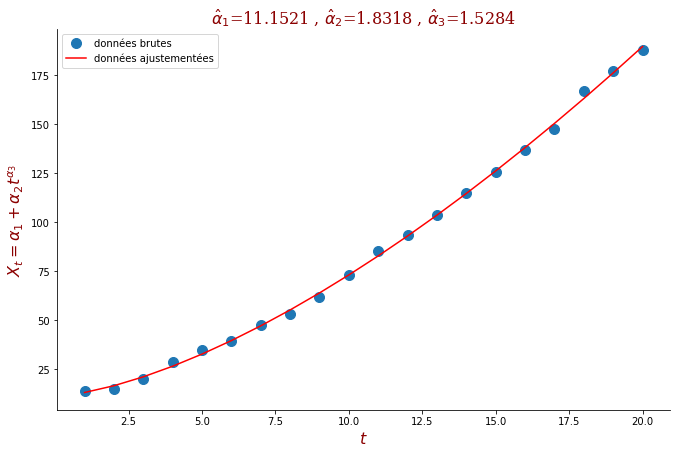

{'parametres': [11.1521, 1.8318, 1.5284], 'variance_residu': 2.8383, 'MSE': 3.5479, 'AIC': 1.3432, 'BIC': 1.4926}


In [2]:
# appel
taille=20
e = 1.52*numpy.random.randn(taille)
t=numpy.arange(1,taille+1,1)
data = 10 + 2 * t**(1.5) + e
print(ajustement_exp_I(data))


## Application aux données 'gdp.dat'

In [3]:
import pandas
data_gdp=  pandas.read_csv('gdp.dat', sep='\s+'  , engine='python',index_col="YEAR")
data_gdp.head(5)

,AUSTRIA,CANADA,FRANCE,GERMANY,GREECE,ITALY,SWEDEN,UK,USA
YEAR,,,,,,,,,
1950,0.027523,3.651109,10.652861,5.725433,18.423605,0.799001,17.072701,1.033571,4.470303
1951,0.029406,3.734242,11.186672,6.256754,19.866240,0.829484,17.445339,1.060015,4.734335
1952,0.029357,3.932222,11.480235,6.703080,19.750938,0.859817,17.011088,1.104598,4.826502
1953,0.030603,4.019939,11.688318,7.256435,22.217731,0.916962,18.063728,1.152221,4.981746
1954,0.033678,3.860731,12.092329,7.726440,22.690231,0.942153,19.031748,1.191948,4.790810


In [4]:
data_gdp.columns

Index(['AUSTRIA', 'CANADA', 'FRANCE', 'GERMANY', 'GREECE', 'ITALY', 'SWEDEN',
       'UK', 'USA'],
      dtype='object')

pays : AUSTRIA


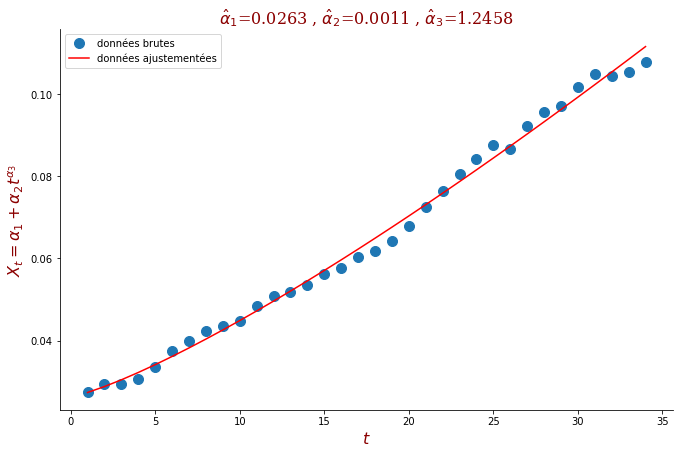

{'parametres': [0.0263, 0.0011, 1.2458], 'variance_residu': 0.0, 'MSE': 0.0, 'AIC': -12.3851, 'BIC': -12.2504}
########################################################################################################################
pays : CANADA


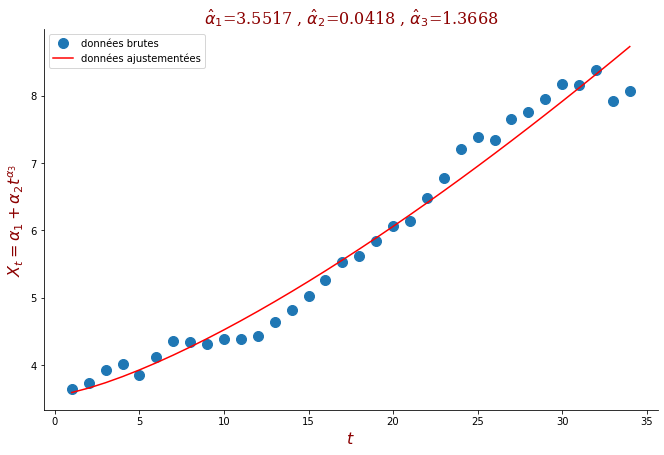

{'parametres': [3.5517, 0.0418, 1.3668], 'variance_residu': 0.0647, 'MSE': 0.0733, 'AIC': -2.5617, 'BIC': -2.427}
########################################################################################################################
pays : FRANCE


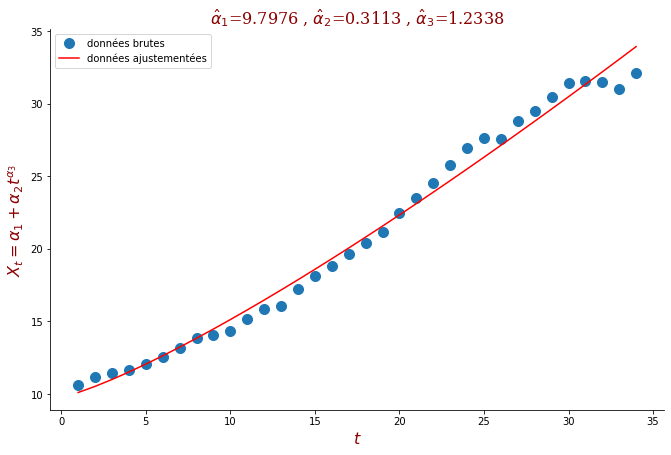

{'parametres': [9.7976, 0.3113, 1.2338], 'variance_residu': 0.6372, 'MSE': 0.7221, 'AIC': -0.2743, 'BIC': -0.1396}
########################################################################################################################
pays : GERMANY


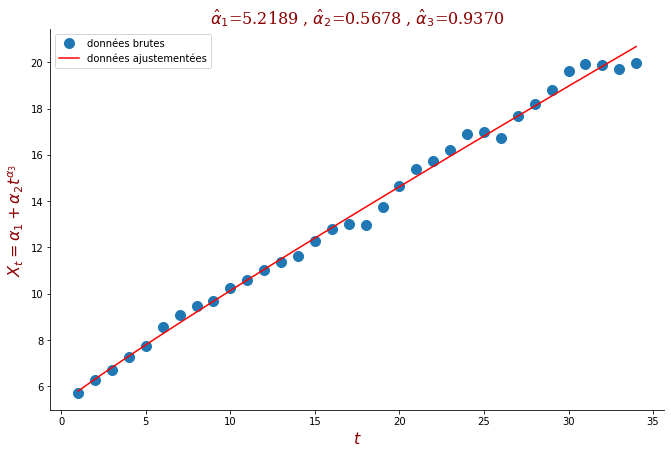

{'parametres': [5.2189, 0.5678, 0.937], 'variance_residu': 0.1098, 'MSE': 0.1245, 'AIC': -2.0322, 'BIC': -1.8975}
########################################################################################################################
pays : GREECE


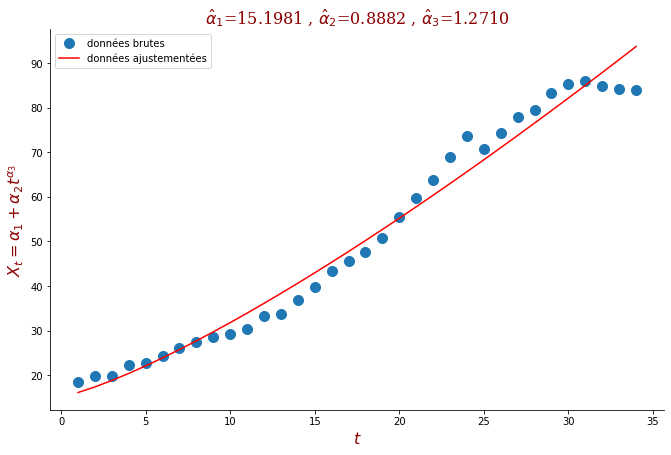

{'parametres': [15.1981, 0.8882, 1.271], 'variance_residu': 12.897, 'MSE': 14.6166, 'AIC': 2.7335, 'BIC': 2.8681}
########################################################################################################################
pays : ITALY


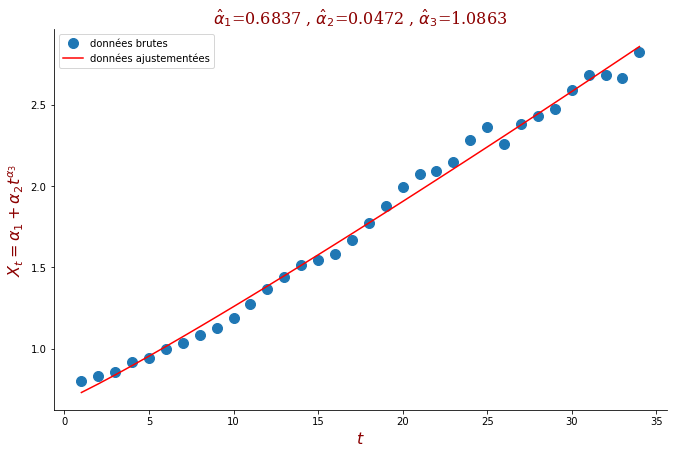

{'parametres': [0.6837, 0.0472, 1.0863], 'variance_residu': 0.0031, 'MSE': 0.0035, 'AIC': -5.6128, 'BIC': -5.4781}
########################################################################################################################
pays : SWEDEN


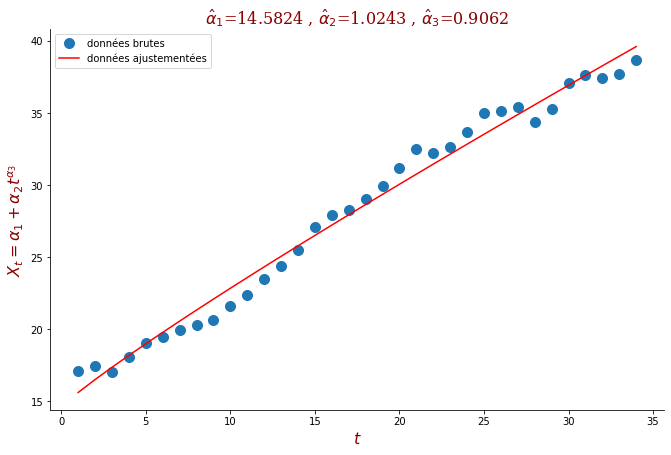

{'parametres': [14.5824, 1.0243, 0.9062], 'variance_residu': 0.7946, 'MSE': 0.9005, 'AIC': -0.0535, 'BIC': 0.0812}
########################################################################################################################
pays : UK


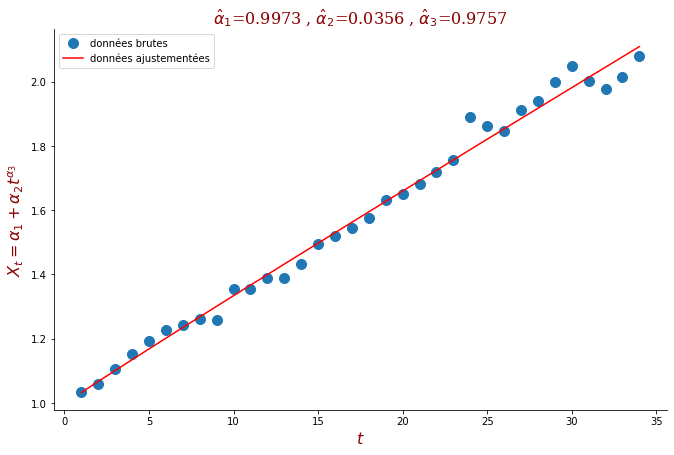

{'parametres': [0.9973, 0.0356, 0.9757], 'variance_residu': 0.0011, 'MSE': 0.0013, 'AIC': -6.5997, 'BIC': -6.465}
########################################################################################################################
pays : USA


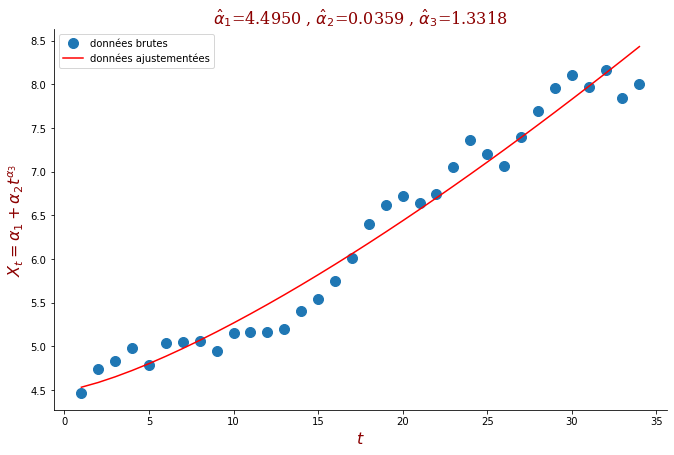

{'parametres': [4.495, 0.0359, 1.3318], 'variance_residu': 0.0518, 'MSE': 0.0587, 'AIC': -2.7834, 'BIC': -2.6487}
########################################################################################################################


In [6]:
for c in data_gdp.columns:
    print("pays :",c)
    R=ajustement_exp_I(data_gdp[c].values.tolist())
    print(R)
    print("####"*30)

<h1  style="color: #6e2c00 ;"> Exercice.  Appliquer le modèle  aux données 'PIB_1960_2018.dat'  </h1>